env: findingzeke

In [41]:
import os
import glob
import requests
import numpy as np

import matplotlib.pyplot as plt  
from matplotlib.image import  imread

In [42]:
from transformers import CLIPTokenizerFast, CLIPProcessor, CLIPModel
import torch

In [43]:
test_image_path = "../images/test/zeke.png"
image_collection_path = "../images/collection"

In [44]:
def initializeCLIP():
    # if you have CUDA or MPS, set it to the active device like this
    device = "cuda" if torch.cuda.is_available() else \
            ("mps" if torch.backends.mps.is_available() else "cpu")
    model_id = "openai/clip-vit-base-patch32" #https://huggingface.co/openai/clip-vit-base-patch32

    # we initialize a tokenizer, image processor, and the model itself
    tokenizer = CLIPTokenizerFast.from_pretrained(model_id) #Used for text embeddings, not relevant in this example.
    processor = CLIPProcessor.from_pretrained(model_id) #Used for image embeddings
    model = CLIPModel.from_pretrained(model_id).to(device) #CLIP model

    return tokenizer, processor, model

tokenizer, processor, model = initializeCLIP()

In [45]:
def getImageEmbedding(image_path, model):

    image = processor(
        text=None,
        images=imread(image_path),
        return_tensors='pt'
    )['pixel_values'].to(device)

    # image.shape
    with torch.no_grad():
        tensor_result = model.get_image_features(image)
        tensor_result_cpu = tensor_result.to("cpu")
        tensor_result_cpu.shape
        # print(tensor_result_cpu.squeeze(0).numpy())
        vector = tensor_result_cpu.squeeze(0).numpy()
        return vector


In [46]:
# getImageEmbedding(image_path=test_image_path, model=model)

In [47]:
def getFilesInDirectory(directory_path):
    
    return glob.glob(os.path.join(directory_path, "*.png")  )  

In [48]:
def getCosineSimilarity(vector_a, vector_b):  
    # Calculate the dot product of the two vectors  
    dot_product = np.dot(vector_a, vector_b)  
      
    # Calculate the magnitude (norm) of each vector  
    norm_a = np.linalg.norm(vector_a)  
    norm_b = np.linalg.norm(vector_b)  
      
    # Calculate the cosine similarity  
    similarity = dot_product / (norm_a * norm_b)  
      
    return similarity  

In [49]:
#Get all files in the directory
file_collection = getFilesInDirectory(image_collection_path)
print(f"{len(file_collection)} files found.")

15 files found.


In [50]:
cosine_similarity_dictionary = {}

embeddings_test_image = getImageEmbedding(image_path=test_image_path, model=model)
print(f"Embedding size: {len(embeddings_test_image)}")

for file in file_collection:
    cosine_similarity = getCosineSimilarity(embeddings_test_image, getImageEmbedding(image_path=file, model=model))
    # print(f"file:{file}, cosine_similarity:{cosine_similarity}")
    cosine_similarity_dictionary[file] = cosine_similarity

print("Embeddings generated and similarity calculated.")
print(type(cosine_similarity_dictionary))

Embedding size: 512


Embeddings generated and similarity calculated.
<class 'dict'>


In [51]:
#Sort descending
sorted_data = sorted(cosine_similarity_dictionary.items(), key=lambda item: item[1], reverse=True)  
print(type(sorted_data))

#View sorted scores
for index, (path, score) in enumerate(sorted_data):    
    print(f"{index}, {path}: {score}")  


<class 'list'>
0, ../images/collection\h14.png: 0.9988315105438232
1, ../images/collection\h13.png: 0.9988089799880981
2, ../images/collection\h10.png: 0.9985732436180115
3, ../images/collection\h2.png: 0.9984249472618103
4, ../images/collection\h11.png: 0.9980379939079285
5, ../images/collection\h8.png: 0.9979413747787476
6, ../images/collection\h3.png: 0.9974879026412964
7, ../images/collection\h15.png: 0.9974144101142883
8, ../images/collection\h1.png: 0.996880292892456
9, ../images/collection\h4.png: 0.996272087097168
10, ../images/collection\h5.png: 0.9960883855819702
11, ../images/collection\h6.png: 0.9956601858139038
12, ../images/collection\h12.png: 0.9946838617324829
13, ../images/collection\h7.png: 0.9945082664489746
14, ../images/collection\h9.png: 0.9865620732307434


**Showing Zeke**


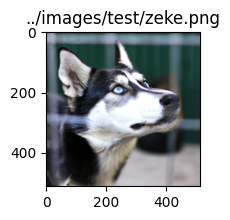

Showing top 3 best matches


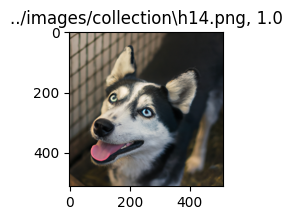

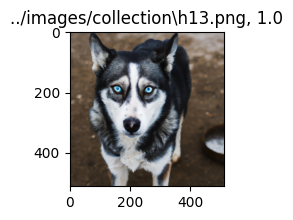

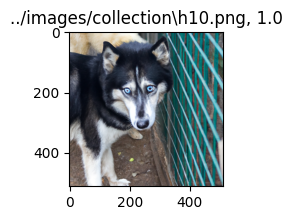

In [55]:
print(f"**Showing Zeke**")

plt.figure(figsize=(2,2))
plt.imshow(imread(test_image_path))  
plt.title(f"{test_image_path}")
plt.show()  


top_N = 3

print(f"Showing top {top_N} best matches")

for index, (path, score) in enumerate(sorted_data[:top_N]):    

    plt.figure(figsize=(2,2))
    plt.imshow(imread(path))  
    plt.title(f"{path}, {round(score,2)}")
    plt.show()

Showing least 3 matches


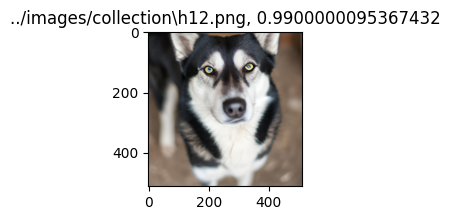

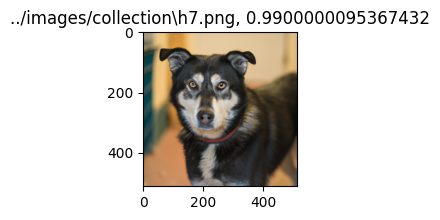

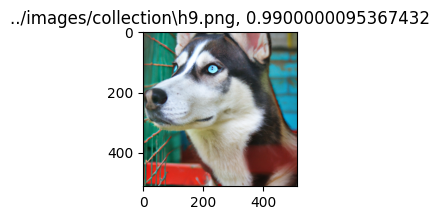

In [53]:
print(f"Showing least {top_N} matches")

for index, (path, score) in enumerate(sorted_data[-top_N:]):    

    plt.figure(figsize=(2,2))
    plt.imshow(imread(path))  
    plt.title(f"{path}, {round(score,2)}")
    plt.show()  